In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import allantools

# Analysis of a continuous-measurement data set.

DEVICE SETTINGS (see data sheet)...

Cycle count [x, y, z]: [800, 800, 800] ; Measurement rate: 0x96

Mean sampling rate: 34.32968053617903 Hz.


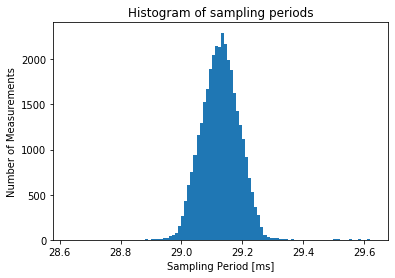

In [2]:
# Loading data file
# Column 1: B_x
# Column 2: B_y
# Column 3: B_z
# Column 4: |B|
# Column 5: time
# Column 6: Δt between measurements
magX = np.loadtxt('mag_data.txt', usecols=0, skiprows=1)
magY = np.loadtxt('mag_data.txt', usecols=1, skiprows=1)
magZ = np.loadtxt('mag_data.txt', usecols=2, skiprows=1)
magn = np.loadtxt('mag_data.txt', usecols=3, skiprows=1)
time = np.loadtxt('mag_data.txt', usecols=4, skiprows=1)
sampling_period = np.loadtxt('mag_data.txt', usecols=5, skiprows=2)

# Define the sampling period as the mean Δt between measurements
tau_0 = np.mean(sampling_period)

# Print device settings
print('DEVICE SETTINGS (see data sheet)...\n')
with open('mag_data.txt', 'r') as file:
    print(file.readline())
print('Mean sampling rate: ' + str(1/tau_0) + ' Hz.')

# Histogram of sampling periods
plt.figure()
plt.hist(sampling_period*10**3, 100, range=(tau_0*10**3 - .5, tau_0*10**3 + .5))
plt.title('Histogram of sampling periods')
plt.xlabel('Sampling Period [ms]')
plt.ylabel('Number of Measurements')
plt.show()

# Compute overlapping Allan variance for B_x, B_y, B_z, and |B|
(tauX, adevX, adev_errorX, nX) = allantools.oadev(magX, rate=1/tau_0, taus='all')
(tauY, adevY, adev_errorY, nY) = allantools.oadev(magY, rate=1/tau_0, taus='all')
(tauZ, adevZ, adev_errorZ, nZ) = allantools.oadev(magZ, rate=1/tau_0, taus='all')
(tau, adev, adev_error, n) = allantools.oadev(magn, rate=1/tau_0, taus='all')

# Compute standard deviation and mean of the measurements
stdX = np.std(magX)
stdY = np.std(magY)
stdZ = np.std(magZ)
std = np.std(magn)
meanX = np.mean(magX)
meanY = np.mean(magY)
meanZ = np.mean(magZ)
mean = np.mean(magn)

# Compute spectral density
(fX, psdX) = sp.signal.periodogram(magX, fs=1/tau_0)
(fY, psdY) = sp.signal.periodogram(magY, fs=1/tau_0)
(fZ, psdZ) = sp.signal.periodogram(magZ, fs=1/tau_0)
(f, psd) = sp.signal.periodogram(magn, fs=1/tau_0)

## B_x

Mean of measurements: 39694.87514418876 nT.
Standard deviation of measurements: 69.42150668113388 nT.


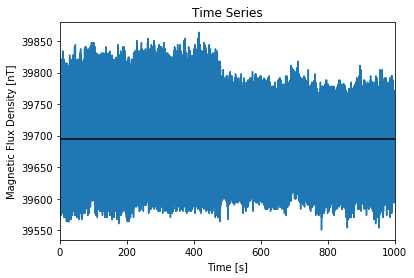

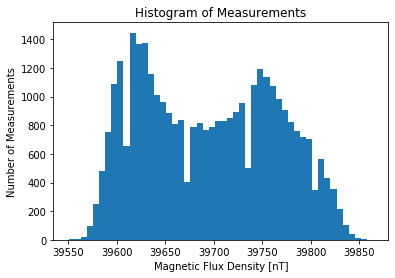

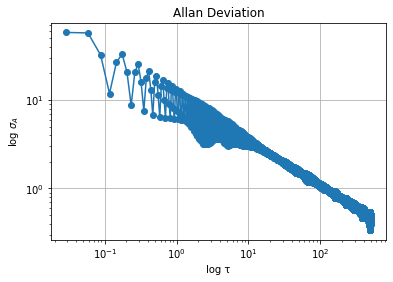

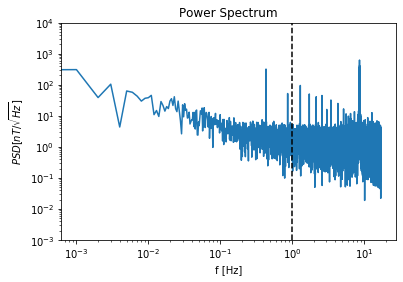

Noise floor at 1 Hz: 2.276197152376473 nT * Hz^(-1/2).


In [3]:
print('Mean of measurements: ' + str(meanX) + ' nT.')
print('Standard deviation of measurements: ' + str(stdX) + ' nT.')

# B_x vs time
plt.figure()
plt.plot(time, magX, zorder=1)
plt.hlines(meanX, 0, 1000, zorder=2)
plt.xlim(0, 1000)
plt.title('Time Series')
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# histogram
plt.figure()
plt.hist(magX, 50)
plt.title('Histogram of Measurements')
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of Allan deviation vs averaging time
plt.figure()
plt.loglog(tauX, np.sqrt(adevX), '-o')
plt.grid()
plt.title('Allan Deviation')
plt.xlabel('log τ')
plt.ylabel(r'log $ \sigma_A $')
plt.show()

# log-log plot of power spectral desity vs frequency
plt.figure()
plt.loglog(fX, np.sqrt(psdX), zorder=1)
plt.vlines(1, 10**-3, 10**4, linestyles='dashed', zorder=2)
plt.ylim(10**-3,10**4)
plt.title('Power Spectrum')
plt.xlabel('f [Hz]')
plt.ylabel(r'$PSD [nT/\sqrt{Hz}]$')
plt.show()

print('Noise floor at 1 Hz: ' + str(np.sqrt(psdX[np.searchsorted(fX, 1., side="left")])) + ' nT * Hz^(-1/2).')

## B_y

Mean of measurements: 23124.332525487913 nT.
Standard deviation of measurements: 76.63406782466706 nT.


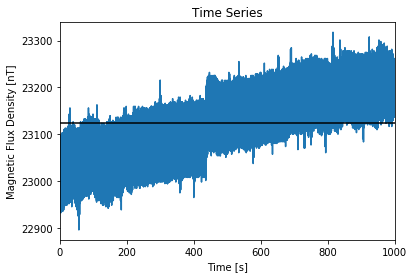

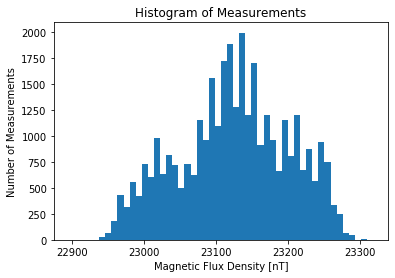

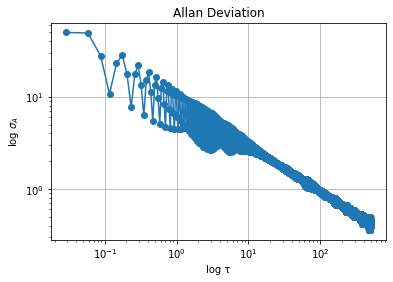

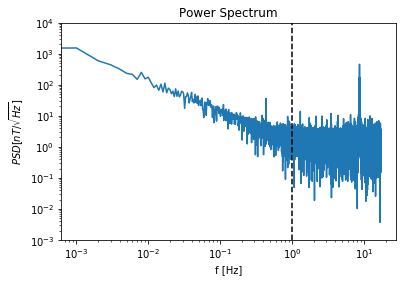

Noise floor at 1 Hz: 1.0294071207232633 nT * Hz^(-1/2).


In [4]:
print('Mean of measurements: ' + str(meanY) + ' nT.')
print('Standard deviation of measurements: ' + str(stdY) + ' nT.')

# B_y vs time
plt.figure()
plt.plot(time, magY, zorder=1)
plt.hlines(meanY, 0, 1000, zorder=2)
plt.xlim(0, 1000)
plt.title('Time Series')
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# histogram
plt.figure()
plt.hist(magY, 50)
plt.title('Histogram of Measurements')
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of Allan deviation vs averaging time
plt.figure()
plt.loglog(tauY, np.sqrt(adevY), '-o')
plt.grid()
plt.title('Allan Deviation')
plt.xlabel('log τ')
plt.ylabel(r'log $ \sigma_A $')
plt.show()

# log-log plot of power spectral desity vs frequency
plt.figure()
plt.loglog(fY, np.sqrt(psdY), zorder=1)
plt.vlines(1, 10**-3, 10**4, linestyles='dashed', zorder=2)
plt.ylim(10**-3,10**4)
plt.title('Power Spectrum')
plt.xlabel('f [Hz]')
plt.ylabel(r'$PSD [nT/\sqrt{Hz}]$')
plt.show()

print('Noise floor at 1 Hz: ' + str(np.sqrt(psdY[np.searchsorted(fY, 1., side="left")])) + ' nT * Hz^(-1/2).')

## B_z

Mean of measurements: -9305.695857850276 nT.
Standard deviation of measurements: 51.650899170437114 nT.


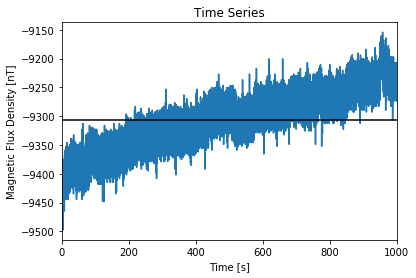

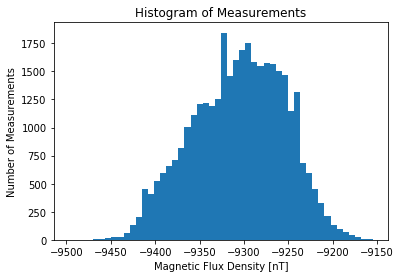

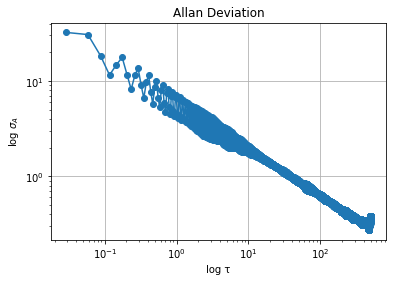

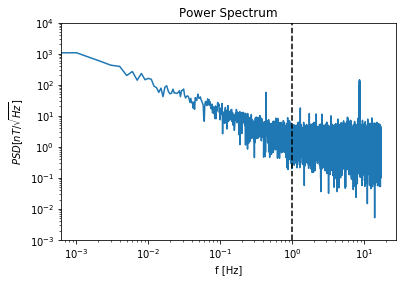

Noise floor at 1 Hz: 1.7856594995622765 nT * Hz^(-1/2).


In [5]:
print('Mean of measurements: ' + str(meanZ) + ' nT.')
print('Standard deviation of measurements: ' + str(stdZ) + ' nT.')

# B_z vs time
plt.figure()
plt.plot(time, magZ, zorder=1)
plt.hlines(meanZ, 0, 1000, zorder=2)
plt.xlim(0, 1000)
plt.title('Time Series')
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# histogram
plt.figure()
plt.hist(magZ, 50)
plt.title('Histogram of Measurements')
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of Allan deviation vs averaging time
plt.figure()
plt.loglog(tauZ, np.sqrt(adevZ), '-o')
plt.grid()
plt.title('Allan Deviation')
plt.xlabel('log τ')
plt.ylabel(r'log $ \sigma_A $')
plt.show()

# log-log plot of power spectral desity vs frequency
plt.figure()
plt.loglog(fZ, np.sqrt(psdZ), zorder=1)
plt.vlines(1, 10**-3, 10**4, linestyles='dashed', zorder=2)
plt.ylim(10**-3,10**4)
plt.title('Power Spectrum')
plt.xlabel('f [Hz]')
plt.ylabel(r'$PSD [nT/\sqrt{Hz}]$')
plt.show()

print('Noise floor at 1 Hz: ' + str(np.sqrt(psdZ[np.searchsorted(fZ, 1., side="left")])) + ' nT * Hz^(-1/2).')

## |B|

Mean of measurements: 46872.442246900995 nT.
Standard deviation of measurements: 36.8864899631919 nT.


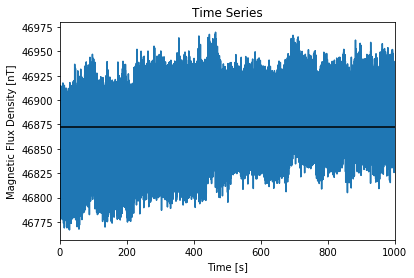

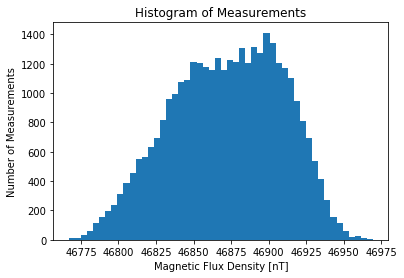

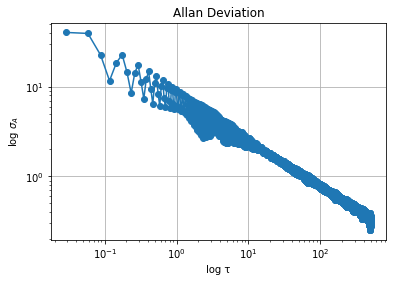

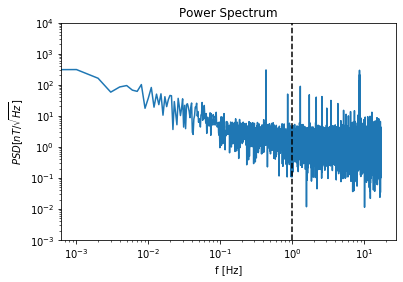

Noise floor at 1 Hz: 1.6395076385847727 nT * Hz^(-1/2).


In [6]:
print('Mean of measurements: ' + str(mean) + ' nT.')
print('Standard deviation of measurements: ' + str(std) + ' nT.')

# |B| vs time
plt.figure()
plt.plot(time, magn, zorder=1)
plt.hlines(mean, 0, 1000, zorder=2)
plt.title('Time Series')
plt.xlim(0, 1000)
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# histogram
plt.figure()
plt.hist(magn, 50)
plt.title('Histogram of Measurements')
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of Allan deviation vs averaging time
plt.figure()
plt.loglog(tau, np.sqrt(adev), '-o')
plt.grid()
plt.title('Allan Deviation')
plt.xlabel('log τ')
plt.ylabel(r'log $ \sigma_A $')
plt.show()

# log-log plot of power spectral desity vs frequency
plt.figure()
plt.loglog(f, np.sqrt(psd), zorder=1)
plt.vlines(1, 10**-3, 10**4, linestyles='dashed', zorder=2)
plt.ylim(10**-3,10**4)
plt.title('Power Spectrum')
plt.xlabel('f [Hz]')
plt.ylabel(r'$PSD [nT/\sqrt{Hz}]$')
plt.show()

print('Noise floor at 1 Hz: ' + str(np.sqrt(psd[np.searchsorted(f, 1., side="left")])) + ' nT * Hz^(-1/2).')

## |B| for the first 10s of data

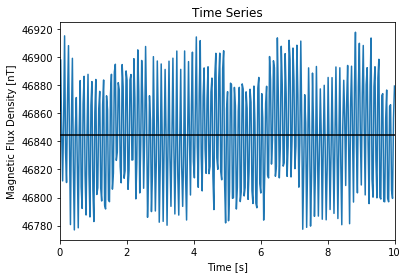

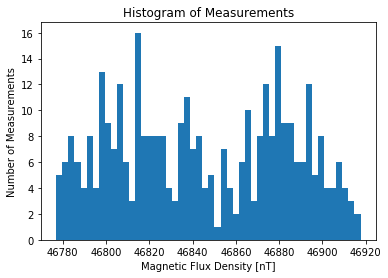

In [7]:
idx_10s = np.searchsorted(time, 10., side="left")

# |B| vs time
plt.figure()
plt.plot(time[0:idx_10s], magn[0:idx_10s], zorder=1)
plt.hlines(np.mean(magn[0:idx_10s]), 0, 10, zorder=2)
plt.xlim(0, 10)
plt.title('Time Series')
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# histogram
plt.figure()
plt.hist(magn[0:idx_10s], 50)
plt.title('Histogram of Measurements')
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# Analysis of a timed-measurement data set, with sampling rate of 32 Hz.

## This sampling rate should alias the 60Hz noise down to 4Hz.

DEVICE SETTINGS (see data sheet)...

# Cycle count [x, y, z]: [800, 800, 800] ; Measurement rate: 32 Hz

Mean sampling rate: 31.99958478812026 Hz.


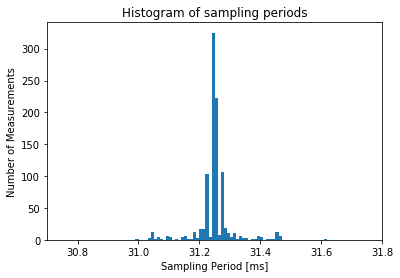

In [8]:
# Loading data file
# Column 1: B_x
# Column 2: B_y
# Column 3: B_z
# Column 4: |B|
# Column 5: time
# Column 6: Δt between measurements
magX_32 = np.loadtxt('mag_data_short_32Hz.txt', usecols=0, skiprows=2)
magY_32 = np.loadtxt('mag_data_short_32Hz.txt', usecols=1, skiprows=2)
magZ_32 = np.loadtxt('mag_data_short_32Hz.txt', usecols=2, skiprows=2)
magn_32 = np.loadtxt('mag_data_short_32Hz.txt', usecols=3, skiprows=2)
time_32 = np.loadtxt('mag_data_short_32Hz.txt', usecols=4, skiprows=2)
sampling_period_32 = np.loadtxt('mag_data_short_32Hz.txt', usecols=5, skiprows=2)

# Define the sampling period as the mean Δt between measurements
tau_0_32 = np.mean(sampling_period_32)
tau_0_32_std = np.std(sampling_period_32)

# Print device settings
print('DEVICE SETTINGS (see data sheet)...\n')
with open('mag_data_short_32Hz.txt', 'r') as file:
    print(file.readline())
print('Mean sampling rate: ' + str(1/tau_0_32) + ' Hz.')

# Histogram of sampling periods
plt.figure()
plt.hist(sampling_period_32*10**3, 100, range=(tau_0_32*10**3 - .5, tau_0_32*10**3 + .5))
plt.title('Histogram of sampling periods')
plt.xlabel('Sampling Period [ms]')
plt.ylabel('Number of Measurements')
plt.show()

# Compute standard deviation and mean of the measurements
stdX_32 = np.std(magX_32)
stdY_32 = np.std(magY_32)
stdZ_32 = np.std(magZ_32)
std_32 = np.std(magn_32)
meanX_32 = np.mean(magX_32)
meanY_32 = np.mean(magY_32)
meanZ_32 = np.mean(magZ_32)
mean_32 = np.mean(magn_32)

# Compute spectral density
(fX_32, psdX_32) = sp.signal.periodogram(magX_32, fs=1/tau_0_32)
(fY_32, psdY_32) = sp.signal.periodogram(magY_32, fs=1/tau_0_32)
(fZ_32, psdZ_32) = sp.signal.periodogram(magZ_32, fs=1/tau_0_32)
(f_32, psd_32) = sp.signal.periodogram(magn_32, fs=1/tau_0_32)

## Raw Data

Mean of measurements: 37824.23478513325 nT.
Standard deviation of measurements: 10.912199213780024 nT.


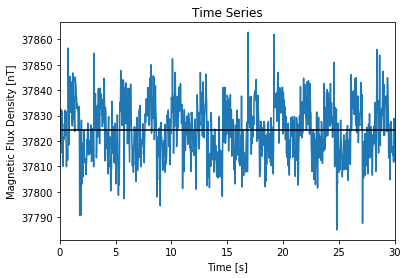

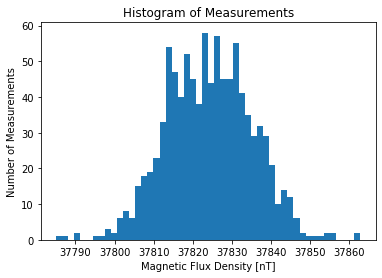

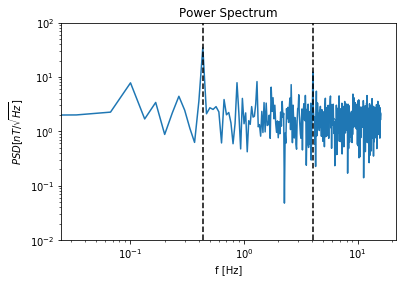

Maximum power density occurs at 0.4337795643853632 Hz.
Second greatest power density occurs at 4.037486714663765 Hz.
For 60 Hz noise, we should expect alias frequency at 3.9991695762405186 Hz.


In [9]:
print('Mean of measurements: ' + str(mean_32) + ' nT.')
print('Standard deviation of measurements: ' + str(std_32) + ' nT.')

# |B| vs time
plt.figure()
plt.plot(time_32, magn_32, zorder=1)
plt.hlines(mean_32, 0, 30, zorder=2)
plt.xlim(0, 30)
plt.title('Time Series')
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# histogram
plt.figure()
plt.hist(magn_32, 50)
plt.title('Histogram of Measurements')
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of power spectral desity vs frequency
plt.figure()
plt.loglog(f_32, np.sqrt(psd_32), zorder=1)
max_idx_32 = np.argmax(psd_32)
max_idx_32_2 = np.argsort(psd_32)[-2]
plt.vlines([f_32[max_idx_32], f_32[max_idx_32_2]], 10**-2, 10**2, linestyles='dashed', zorder=2)
plt.ylim(10**-2,10**2)
plt.title('Power Spectrum')
plt.xlabel('f [Hz]')
plt.ylabel(r'$PSD [nT/\sqrt{Hz}]$')
plt.show()

print('Maximum power density occurs at ' + str(f_32[max_idx_32]) + ' Hz.')
print('Second greatest power density occurs at ' + str(f_32[max_idx_32_2]) + ' Hz.')
print('For 60 Hz noise, we should expect alias frequency at ' + str(abs(60 - 2/tau_0_32)) + ' Hz.')

## Adjusted Data

Calculated parameters for fitted 60Hz sine wave (see fit_func0): 
[-8.75442665e-01  9.73409583e-01  3.78242342e+04]

Calculated parameters for fitted 180Hz sine wave (see fit_func1): 
[-6.22380724e-01  9.99280091e-01  3.78242383e+04]

Calculated parameters for fitted 0.434Hz sine wave (see fit_func2): 
[-8.94840532e+00  5.02797736e-01  3.78242392e+04]


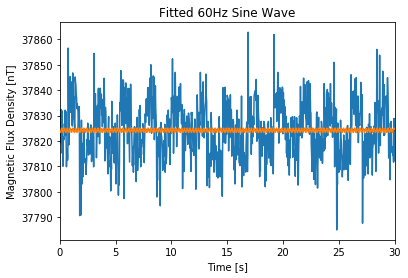

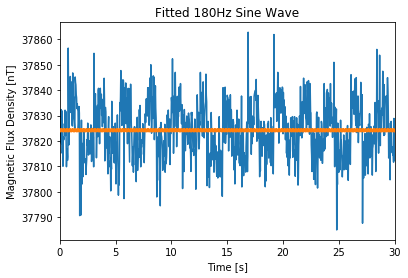

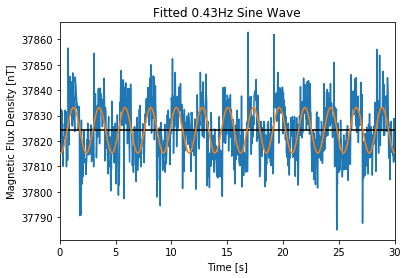

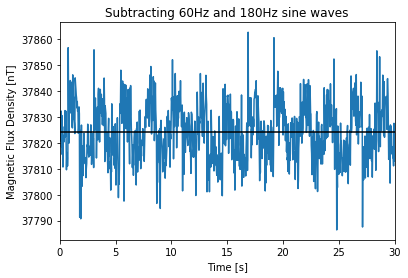

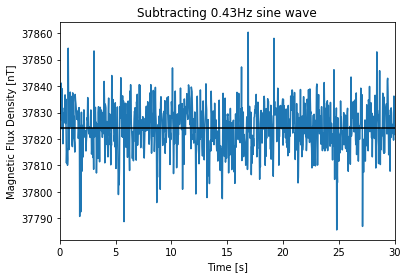

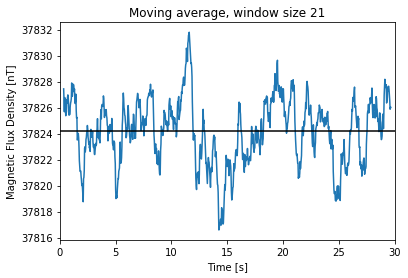

Mean of raw data: 37824.23478513325 nT
Mean of adjusted data: 37824.17990703463 nT

Standard deviation of raw data: 10.912199213780024 nT
Standard deviation of adjusted data: 2.53686311138001 nT


In [10]:
# Define general sine wave for fitting
def fit_func(t, a, b, c, f):
    return a * np.sin(f*2*np.pi*(t + b)) + c
# Define 60Hz sine wave for fitting
def fit_func0(t, a, b, c):
    return a * np.sin(60*2*np.pi*(t + b)) + c
# Define 180Hz sine wave for fitting
def fit_func1(t, a, b, c):
    return a * np.sin(180*2*np.pi*(t + b)) + c
# Define 0.434Hz sine wave for fitting
def fit_func2(t, a, b, c):
    return a * np.sin(0.434*2*np.pi*(t + b)) + c

# Fit a 60 Hz sine wave to the data
params1, params_covariance1 = sp.optimize.curve_fit(fit_func0, time_32, magn_32, p0=[1,1,1])
print('Calculated parameters for fitted 60Hz sine wave (see fit_func0): ')
print(params1)
# Fit a 180 Hz sine wave to the data
params2, params_covariance2 = sp.optimize.curve_fit(fit_func1, time_32, magn_32, p0=[1,1,1])
print('\nCalculated parameters for fitted 180Hz sine wave (see fit_func1): ')
print(params2)
# Fit a 0.43 Hz sine wave to the data
params3, params_covariance3 = sp.optimize.curve_fit(fit_func2, time_32, magn_32, p0=[1,1,1])
print('\nCalculated parameters for fitted 0.434Hz sine wave (see fit_func2): ')
print(params3)

# |B| vs time, with a fitted 60 Hz sine wave
plt.figure()
plt.plot(time_32, magn_32, zorder=1)
plt.hlines(mean_32, 0, 30, zorder=2)
plt.plot(time_32, fit_func0(time_32, params1[0], params1[1], params1[2]), zorder=3)
plt.xlim(0, 30)
plt.title('Fitted 60Hz Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# |B| vs time, with a fitted 180 Hz sine wave
plt.figure()
plt.plot(time_32, magn_32, zorder=1)
plt.hlines(mean_32, 0, 30, zorder=2)
plt.plot(time_32, fit_func1(time_32, params2[0], params2[1], params2[2]), zorder=3)
plt.xlim(0, 30)
plt.title('Fitted 180Hz Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# |B| vs time, with a fitted 0.43 Hz sine wave
plt.figure()
plt.plot(time_32, magn_32, zorder=1)
plt.hlines(mean_32, 0, 30, zorder=2)
plt.plot(time_32, fit_func2(time_32, params3[0], params3[1], params3[2]), zorder=3)
plt.xlim(0, 30)
plt.title('Fitted 0.43Hz Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# Subtract the 60Hz and 180Hz sine waves from |B|, preserving the vertical offset
adjusted_magn1 = (magn_32 - fit_func0(time_32, params1[0], params1[1], params1[2]) + params1[2]
                  - fit_func1(time_32, params2[0], params2[1], params2[2]) + params2[2])
adjusted_mean1 = np.mean(adjusted_magn1)

# |B| vs time, minus the 60Hz and 180Hz sine waves
plt.figure()
plt.plot(time_32, adjusted_magn1, zorder=1)
plt.hlines(adjusted_mean1, 0, 30, zorder=2)
plt.xlim(0, 30)
plt.title('Subtracting 60Hz and 180Hz sine waves')
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# Subtract the 0.43Hz sine wave from |B|, preserving the vertical offset
adjusted_magn2 = adjusted_magn1 - fit_func2(time_32, params3[0], params3[1], params3[2]) + params3[2]
adjusted_mean2 = np.mean(adjusted_magn2)

# |B| vs time, minus the 0.43Hz sine wave
plt.figure()
plt.plot(time_32, adjusted_magn2, zorder=1)
plt.hlines(adjusted_mean2, 0, 30, zorder=2)
plt.xlim(0, 30)
plt.title('Subtracting 0.43Hz sine wave')
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# Define moving average function
def moving_average(data_set, periods):
    weights = np.ones(periods) / periods
    return np.convolve(data_set, weights, mode='valid')

# Take moving average of adjusted data
window = 21
adjusted_magn_ma = moving_average(adjusted_magn2, window)
adjusted_mean_ma = np.mean(adjusted_magn_ma)
std_32_ma = np.std(adjusted_magn_ma)

# |B| vs time, minus the 60 Hz sine wave, averaged
plt.figure()
plt.plot(time_32[int((window-1)/2):int(-(window-1)/2)], adjusted_magn_ma, zorder=1)
plt.hlines(adjusted_mean_ma, 0, 30, zorder=2)
plt.xlim(0, 30)
plt.title('Moving average, window size ' + str(window))
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

print('Mean of raw data: ' + str(mean_32) + ' nT')
print('Mean of adjusted data: ' + str(adjusted_mean_ma) + ' nT\n')
print('Standard deviation of raw data: ' + str(std_32) + ' nT')
print('Standard deviation of adjusted data: ' + str(std_32_ma) + ' nT')

# Analysis of another timed-measurement data set, with a sampling rate of 30 Hz.

## This sampling rate should alias the 60Hz noise to a constant DC offset.

DEVICE SETTINGS (see data sheet)...

# Cycle count [x, y, z]: [800, 800, 800] ; Measurement rate: 30 Hz

Mean sampling rate: 29.99961593088519 Hz.
Mean sampling period: 33.3337600822576 ms.
Standard deviation of sampling period: 0.07688525122430025 ms.


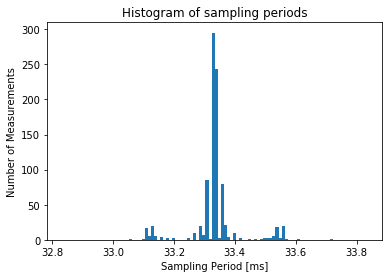

In [11]:
# Loading data file
# Column 1: B_x
# Column 2: B_y
# Column 3: B_z
# Column 4: |B|
# Column 5: time
# Column 6: Δt between measurements
magX_30 = np.loadtxt('mag_data_short_30Hz.txt', usecols=0, skiprows=2)
magY_30 = np.loadtxt('mag_data_short_30Hz.txt', usecols=1, skiprows=2)
magZ_30 = np.loadtxt('mag_data_short_30Hz.txt', usecols=2, skiprows=2)
magn_30 = np.loadtxt('mag_data_short_30Hz.txt', usecols=3, skiprows=2)
time_30 = np.loadtxt('mag_data_short_30Hz.txt', usecols=4, skiprows=2)
sampling_period_30 = np.loadtxt('mag_data_short_30Hz.txt', usecols=5, skiprows=2)

# Define the sampling period as the mean Δt between measurements
tau_0_30 = np.mean(sampling_period_30)
tau_0_30_std = np.std(sampling_period_30)

# Print device settings
print('DEVICE SETTINGS (see data sheet)...\n')
with open('mag_data_short_30Hz.txt', 'r') as file:
    print(file.readline())
print('Mean sampling rate: ' + str(1/tau_0_30) + ' Hz.')
print('Mean sampling period: ' + str(tau_0_30*10**3) + ' ms.')
print('Standard deviation of sampling period: ' + str(tau_0_30_std*10**3) + ' ms.')

# Histogram of sampling periods
plt.figure()
plt.hist(sampling_period_30*10**3, 100, range=(tau_0_30*10**3 - .5, tau_0_30*10**3 + .5))
plt.title('Histogram of sampling periods')
plt.xlabel('Sampling Period [ms]')
plt.ylabel('Number of Measurements')
plt.show()

# Compute standard deviation and mean of the measurements
stdX_30 = np.std(magX_30)
stdY_30 = np.std(magY_30)
stdZ_30 = np.std(magZ_30)
std_30 = np.std(magn_30)
meanX_30 = np.mean(magX_30)
meanY_30 = np.mean(magY_30)
meanZ_30 = np.mean(magZ_30)
mean_30 = np.mean(magn_30)

# Compute spectral density
(fX_30, psdX_30) = sp.signal.periodogram(magX_30, fs=1/tau_0_30)
(fY_30, psdY_30) = sp.signal.periodogram(magY_30, fs=1/tau_0_30)
(fZ_30, psdZ_30) = sp.signal.periodogram(magZ_30, fs=1/tau_0_30)
(f_30, psd_30) = sp.signal.periodogram(magn_30, fs=1/tau_0_30)

## Raw Data

Mean of measurements: 37837.804211820956 nT.
Standard deviation of measurements: 10.666154840646447 nT.


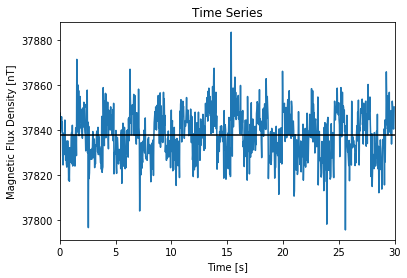

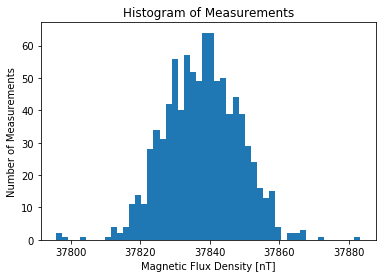

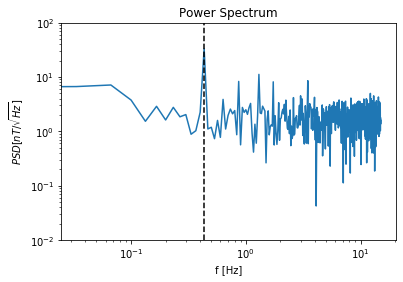

Maximum power density occurs at 0.433809796553401 Hz.
For 60 Hz noise, we should expect alias frequency at 0.0007681382296169659 Hz.


In [12]:
print('Mean of measurements: ' + str(mean_30) + ' nT.')
print('Standard deviation of measurements: ' + str(std_30) + ' nT.')

# |B| vs time
plt.figure()
plt.plot(time_30, magn_30, zorder=1)
plt.hlines(mean_30, 0, 30, zorder=2)
plt.xlim(0, 30)
plt.title('Time Series')
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# histogram
plt.figure()
plt.hist(magn_30, 50)
plt.title('Histogram of Measurements')
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of power spectral desity vs frequency
plt.figure()
plt.loglog(f_30, np.sqrt(psd_30), zorder=1)
max_idx_30 = np.argmax(psd_30)
plt.vlines(f_30[max_idx_30], 10**-2, 10**2, linestyles='dashed', zorder=2)
plt.ylim(10**-2,10**2)
plt.title('Power Spectrum')
plt.xlabel('f [Hz]')
plt.ylabel(r'$PSD [nT/\sqrt{Hz}]$')
plt.show()

print('Maximum power density occurs at ' + str(f_30[max_idx_30]) + ' Hz.')
print('For 60 Hz noise, we should expect alias frequency at ' + str(abs(60 - 2/tau_0_30)) + ' Hz.')

## Adjusted Data

Calculated parameters for fitted 0.43Hz sine wave (see fit_func): 
[8.53422574e+00 8.96679919e-01 3.78378021e+04]


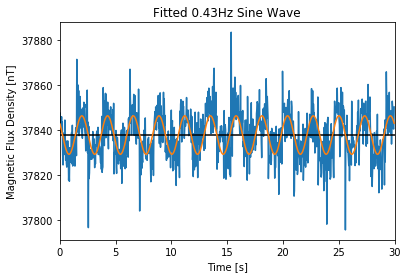

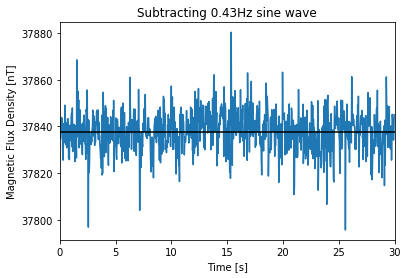

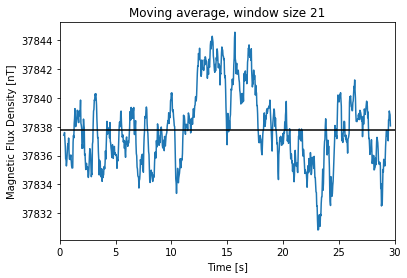

Mean of raw data: 37837.804211820956 nT
Mean of adjusted data: 37837.804972370825 nT

Standard deviation of raw data: 10.666154840646447 nT
Standard deviation of adjusted data: 2.569359602843339 nT


In [13]:
# Fit a 0.43 Hz sine wave to the data
params4, params_covariance4 = sp.optimize.curve_fit(fit_func2, time_30, magn_30, p0=[1,1,1])
print('Calculated parameters for fitted 0.43Hz sine wave (see fit_func): ')
print(params4)

# |B| vs time, with a fitted 0.43 Hz sine wave
plt.figure()
plt.plot(time_30, magn_30, zorder=1)
plt.hlines(mean_30, 0, 30, zorder=2)
plt.plot(time_30, fit_func2(time_30, params4[0], params4[1], params4[2]), zorder=3)
plt.xlim(0, 30)
plt.title('Fitted 0.43Hz Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# Subtract the 0.43Hz sine wave from |B|, preserving the vertical offset
adjusted_magn3 = magn_30 - fit_func2(time_30, params4[0], params4[1], params4[2]) + params4[2]
adjusted_mean3 = np.mean(adjusted_magn3)

# |B| vs time, minus the 0.43Hz sine wave
plt.figure()
plt.plot(time_30, adjusted_magn3, zorder=1)
plt.hlines(adjusted_mean3, 0, 30, zorder=2)
plt.xlim(0, 30)
plt.title('Subtracting 0.43Hz sine wave')
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

# Take moving average of data
window = 21
magn_30_ma = moving_average(adjusted_magn3, window)
mean_30_ma = np.mean(magn_30_ma)
std_30_ma = np.std(magn_30_ma)

# |B| vs time, minus the 60 Hz sine wave, averaged
plt.figure()
plt.plot(time_30[int((window-1)/2):int(-(window-1)/2)], magn_30_ma, zorder=1)
plt.hlines(mean_30_ma, 0, 30, zorder=2)
plt.xlim(0, 30)
plt.title('Moving average, window size ' + str(window))
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

print('Mean of raw data: ' + str(mean_30) + ' nT')
print('Mean of adjusted data: ' + str(mean_30_ma) + ' nT\n')
print('Standard deviation of raw data: ' + str(std_30) + ' nT')
print('Standard deviation of adjusted data: ' + str(std_30_ma) + ' nT')